In [76]:
# Importing necessary libraries
from bs4 import BeautifulSoup  # For web scraping
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import requests  # For making HTTP requests
from sqlalchemy import create_engine  # For connecting to PostgreSQL
import psycopg2  # For interacting with PostgreSQL database
import seaborn as sns  # For data visualization 
import matplotlib.pyplot as plt

In [4]:
# Function to extract product name from the soup object
def product_name(Soup):
    try:
        # Extracting the product name using the 'id' attribute of the HTML element
        name = Soup.find('span', attrs={'id': 'productTitle'}).text.strip()
    except AttributeError:
        # If product name is not found, return an empty string
        name = '' 
    return name

# Function to extract product rating
def rating(Soup):
    try:
        # Extracting the rating using the class name of the rating element
        rate = Soup.find('i', attrs={'class': 'a-icon a-icon-star a-star-4-5 cm-cr-review-stars-spacing-big'}).text.replace('out of 5 stars', '').replace(' ', '').strip()
    except AttributeError:
        # If rating is not found, return an empty string
        rate = ''
    return rate

# Function to extract product price
def price(Soup):
    try:
        # Extracting price based on the class name of the price element
        price = Soup.find('span', attrs={'class': 'a-size-base a-color-base'}).text.strip()
    except AttributeError:
        # If price is not found, return an empty string
        price = ''
    return price

# Function to extract brand name of the product
def brand(Soup):
    try:
        # Extracting the brand name and converting it to uppercase
        brand_name = Soup.find('span', attrs={'class': 'a-size-base po-break-word'}).text.upper().strip()
    except AttributeError:
        # If brand is not found, return an empty string
        brand_name = ''
    return brand_name

# Function to extract the model name
def model_name(Soup):
    try:
        # Extracting model name based on a specific class name in a table row
        first_localize = Soup.find('tr', attrs={'class': 'a-spacing-small po-model_name'})
        second_localize = first_localize.find('td', attrs={'class': 'a-span9'})
        name = second_localize.find('span', attrs={'class': 'a-size-base po-break-word'}).text.strip()
    except AttributeError:
        # If model name is not found, return an empty string
        name = ''
    return name

# Function to extract screen size of the product
def screen_size(Soup):
    try:
        # Extracting screen size in a similar way as model name
        first_localize = Soup.find('tr', attrs={'class': 'a-spacing-small po-display.size'})
        second_localize = first_localize.find('td', attrs={'class': 'a-span9'})
        size = second_localize.find('span', attrs={'class': 'a-size-base po-break-word'}).text.strip()
    except AttributeError:
        # If screen size is not found, return an empty string
        size = ''
    return size

# Function to extract product color
def color(Soup):
    try:
        # Extracting color in a similar way as model name
        first_localize = Soup.find('tr', attrs={'class': 'a-spacing-small po-color'})
        second_localize = first_localize.find('td', attrs={'class': 'a-span9'})
        colour = second_localize.find('span', attrs={'class': 'a-size-base po-break-word'}).text.strip()
    except AttributeError:
        # If color is not found, return an empty string
        colour = ''
    return colour

# Function to extract hard disk size of the product
def hard_disk_size(Soup):
    try:
        # Extracting hard disk size in a similar way as model name
        first_localize = Soup.find('tr', attrs={'class': 'a-spacing-small po-hard_disk.size'})
        second_localize = first_localize.find('td', attrs={'class': 'a-span9'})
        disk = second_localize.find('span', attrs={'class': 'a-size-base po-break-word'}).text.strip()
    except AttributeError:
        # If hard disk size is not found, return an empty string
        disk = ''
    return disk

# Function to extract CPU model of the product
def cpu_model(Soup):
    try:
        # Extracting CPU model in a similar way as model name
        first_localize = Soup.find('tr', attrs={'class': 'a-spacing-small po-cpu_model.family'})
        second_localize = first_localize.find('td', attrs={'class': 'a-span9'})
        cpu = second_localize.find('span', attrs={'class': 'a-size-base po-break-word'}).text.strip()
    except AttributeError:
        # If CPU model is not found, return an empty string
        cpu = ''
    return cpu

# Function to extract RAM size of the product
def ram_memory(Soup):
    try:
        # Extracting RAM memory in a similar way as model name
        first_localize = Soup.find('tr', attrs={'class': 'a-spacing-small po-ram_memory.installed_size'})
        second_localize = first_localize.find('td', attrs={'class': 'a-span9'})
        ram = second_localize.find('span', attrs={'class': 'a-size-base po-break-word'}).text.strip()
    except AttributeError:
        # If RAM memory is not found, return an empty string
        ram = ''
    return ram

# Function to extract special features of the product
def special_feature(Soup):
    try:
        # Extracting special features in a similar way as model name
        first_localize = Soup.find('tr', attrs={'class': 'a-spacing-small po-special_feature'})
        second_localize = first_localize.find('td', attrs={'class': 'a-span9'})
        feature = second_localize.find('span', attrs={'class': 'a-size-base po-break-word'}).text.strip()
    except AttributeError:
        # If special feature is not found, return an empty string
        feature = ''
    return feature

# Creating a dictionary to store extracted data
df_dict = {
    'Product Name': [],
    'Brand': [],
    'Model Name': [],
    'Screen Size': [],
    'Color': [],
    'Hard Disk Size': [],
    'CPU Model': [],
    'Ram': [],
    'Special Feature': [],
    'Price': [],
    'Rating': []
}

# Function to scrape product data from a given Amazon page URL
def process(url):
    # Setting headers to simulate a real browser visit
    hd = ({'User-Agent': '', 'Accept-Language': 'en-US, en;q=0.5'})
    
    # Sending request to the given URL and creating a BeautifulSoup object
    response = requests.get(url, headers=hd)
    html_doc = response.text
    soup = BeautifulSoup(html_doc, 'html.parser')
    
    # Extracting all product links on the page
    links = soup.find_all('a', attrs={'class': 'a-link-normal s-no-outline'})
    links_list = [link.get('href') for link in links]
    
    # Looping through all extracted links to scrape individual product data
    for link in links_list:
        res = requests.get(f'https://www.amazon.com{link}', headers=hd)
        Soup = BeautifulSoup(res.text, 'html.parser')
        
        # Appending scraped data to the dictionary
        df_dict['Product Name'].append(product_name(Soup))
        df_dict['Brand'].append(brand(Soup))
        df_dict['Model Name'].append(model_name(Soup))
        df_dict['Screen Size'].append(screen_size(Soup))
        df_dict['Color'].append(color(Soup))
        df_dict['Hard Disk Size'].append(hard_disk_size(Soup))
        df_dict['CPU Model'].append(cpu_model(Soup))
        df_dict['Ram'].append(ram_memory(Soup))
        df_dict['Special Feature'].append(special_feature(Soup))
        df_dict['Price'].append(price(Soup))
        df_dict['Rating'].append(rating(Soup))

# URLs of Amazon laptop pages to scrape data from
page1 = 'https://www.amazon.com/s?k=laptop&crid=KMSC7YHT212G&sprefix=laptop%2Caps%2C474&ref=nb_sb_noss_1'
page2 = 'https://www.amazon.com/s?k=laptop&page=2&crid=KMSC7YHT212G&qid=1725929797&sprefix=laptop%2Caps%2C474&ref=sr_pg_2'
pages = [page1, page2]

# Loop through each page and scrape data
for page in pages:
    process(page)

In [5]:
# Creating a DataFrame from the scraped data dictionary
df = pd.DataFrame(df_dict)

In [6]:
# Identifying duplicate rows based on 'Product Name'
duplicates = df.duplicated(subset = 'Product Name', keep = False)
df[duplicates].sort_values('Product Name')

,Product Name,Brand,Model Name,Screen Size,Color,Hard Disk Size,CPU Model,Ram,Special Feature,Price,Rating
11,Acer Predator Triton Neo 16 Gaming Creator Lap...,ACER,Acer Predator Triton Neo 16 Gaming Creator Laptop,16 Inches,Silver,1 TB,Intel Core i7,16 GB,"Fingerprint Reader, Backlit Keyboard, Memory C...","$1,249.99",
32,Acer Predator Triton Neo 16 Gaming Creator Lap...,ACER,Acer Predator Triton Neo 16 Gaming Creator Laptop,16 Inches,Silver,1 TB,Intel Core i7,16 GB,"Fingerprint Reader, Backlit Keyboard, Memory C...","$1,249.99",
0,"LG gram 14-inch Lightweight Laptop, Intel Evo ...",LG,14Z90S-G.ARW3U1,14 Inches,White,512 GB,Intel Core Ultra 5,8 GB,"Backlit Keyboard, Anti Glare Coating",$999.00,
23,"LG gram 14-inch Lightweight Laptop, Intel Evo ...",LG,14Z90S-G.ARW3U1,14 Inches,White,512 GB,Intel Core Ultra 5,8 GB,"Backlit Keyboard, Anti Glare Coating",$999.00,
6,LG gram Pro 2 in1 16-inch Lightweight and Vers...,LG,16T90SP-G.AAB6U1,16 Inches,Black,1 TB,Intel Core Ultra 7,16 GB,,"$1,397.00",4.6
33,LG gram Pro 2 in1 16-inch Lightweight and Vers...,LG,16T90SP-G.AAB6U1,16 Inches,Black,1 TB,Intel Core Ultra 7,16 GB,,"$1,397.00",4.6


In [7]:
# Removing duplicate rows based on 'Product Name'
df.drop_duplicates(inplace = True)

In [8]:
# Replacing empty strings with NaN values for better data handling
df.replace('', np.nan, inplace = True)


In [9]:
# Loop through the DataFrame and correct the misplaced values
for index, row in df.iterrows():
    # Check if the value in the 'Price' column is not a valid price (doesn't start with '$')
    if not str(row['Price']).startswith('$'):
        # Check if the value is not NaN
        if pd.notna(row['Price']):
            # Move the value from 'Price' to 'Rating' 
            df.at[index, 'Rating'] = row['Price']
            # Set the 'Price' column to NaN after moving the value
            df.at[index, 'Price'] = np.nan

In [10]:
# Convert 'Screen Size' to float and remove 'Inches'
df['Screen Size'] = df['Screen Size'].replace('Inches', '', regex = True).astype(float)

# Convert 'Price' to float and remove the '$' symbol
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].str.replace('$','').astype(float)

# Convert 'Rating' to float
df['Rating'] = df['Rating'].astype(float)

# Convert 'Ram' to a categorical column
df['Ram'] = df['Ram'].replace('GB', '', regex = True).astype('category')
 

In [11]:
# Check the final result
df

,Product Name,Brand,Model Name,Screen Size,Color,Hard Disk Size,CPU Model,Ram,Special Feature,Price,Rating
0,"LG gram 14-inch Lightweight Laptop, Intel Evo ...",LG,14Z90S-G.ARW3U1,14.0,White,512 GB,Intel Core Ultra 5,8,"Backlit Keyboard, Anti Glare Coating",999.00,NaN
1,"LG gram 17-inch Lightweight Laptop, Intel Evo ...",LG,17Z90S-H.AAB6U1,17.0,Black,1 TB,Intel Core Ultra 7,16,"HD Audio, Backlit Keyboard, Anti Glare Coating...",999.99,NaN
2,"Lenovo IdeaPad 1 Laptop, 15.6” FHD Display, AM...",LENOVO,"Ideapad 1 15"" - 82R400EMUS",15.6,Gray,512 GB,AMD Ryzen 5 5500U,8,Anti Glare Coating,304.99,4.4
3,"HP Newest 14"" Ultral Light Laptop for Students...",HP,HP Laptop,14.0,Snowflake White,64 GB,Celeron N,8,HD Audio,NaN,4.1
4,"HP 14 Laptop, Intel Celeron N4020, 4 GB RAM, 6...",HP,14-dq0040nr,14.0,Snowflake White,64 GB,Celeron N4020,4,Micro-edge Bezel,NaN,NaN
5,"ASUS 15.6” Vivobook Go Laptop, Intel Celeron N...",ASUS,L510KA-ES04,15.6,Star Black,NaN,Celeron,4,NaN,189.99,NaN
6,LG gram Pro 2 in1 16-inch Lightweight and Vers...,LG,16T90SP-G.AAB6U1,16.0,Black,1 TB,Intel Core Ultra 7,16,NaN,1397.00,4.6
7,"ASUS Chromebook CM14 Laptop, 14"" HD Anti-Glare...",ASUS,Chromebook CM14,14.0,Gravity Grey,NaN,MediaTek Helio,4,Memory Card Slot,279.45,4.3
8,Dell Inspiron 15 3000 3520 Business Laptop Com...,DELL,Dell Inspiron,15.6,Black,1 TB,Core i5,16,Numeric Keypad,NaN,NaN
9,Acer Nitro V Gaming Laptop | Intel Core i5-134...,ACER,Nitro V,15.6,Black,512 GB,Intel Core i5,8,Backlit Keyboard,649.99,4.5


In [12]:
# Database connection setup for PostgreSQL using SQLAlchemy
host = 'localhost'
port = '5432'
database = 'postgres'
username = 'postgres'
password = '********'
db_url = f'postgresql://{username}:{password}@{host}:{port}/{database}'

# Creating the engine to connect to PostgreSQL
engine = create_engine(db_url)

# Storing the DataFrame into the 'Laptop' table in PostgreSQL, replacing if the table exists
df.to_sql('Laptop', engine, if_exists = 'replace', index = False)



41

In [51]:
# Establishing a connection to PostgreSQL using psycopg2
connection = psycopg2.connect(
    host = host,
    port = port,
    database = database,
    user = username,
    password = password
)

# Creating a cursor to execute SQL queries
cursor = connection.cursor()

# Executing a SQL query to retrieve data from the 'Laptop' table
cursor.execute('''
    SELECT "Brand",avg("Price"),avg("Rating") 
    FROM "Laptop"
    Group by "Brand"
    Order by avg("Price") desc
''')

# Fetching all the records and storing them in a DataFrame
laptop = cursor.fetchall()
laptop = pd.DataFrame(data = laptop, columns = [
    'Brand',
    'Price Average',
    'Rating Average'])
cursor.close()
connection.close()



In [71]:
laptop

,Brand,Price Average,Rating Average
0,HP,NaN,4.200000
1,DELL,NaN,4.300000
2,GIGABYTE,1182.840000,4.300000
3,LG,1139.194000,4.550000
4,LENOVO,905.166000,4.400000
5,MSI,825.326667,4.333333
6,ASUS,816.058571,4.300000
7,ACER,673.705714,4.550000


In [73]:
# Laptops which got the best rating
Best_Rated = laptop[laptop['Rating Average'] == laptop['Rating Average'].max()].reset_index(drop = True)
Best_Rated

,Brand,Price Average,Rating Average
0,LG,1139.194000,4.55
1,ACER,673.705714,4.55


In [75]:
# Laptops which are under $1000 based on ratings
Best_laptop = laptop[laptop['Price Average'] < 1000].sort_values('Rating Average', ascending = False).reset_index(drop = True)
Best_laptop


,Brand,Price Average,Rating Average
0,ACER,673.705714,4.550000
1,LENOVO,905.166000,4.400000
2,MSI,825.326667,4.333333
3,ASUS,816.058571,4.300000


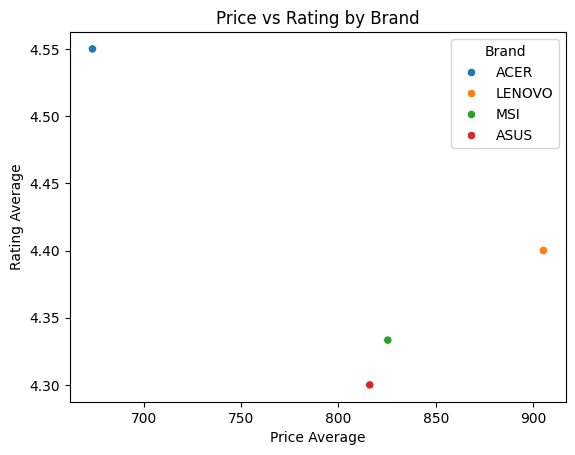

In [77]:
# Scatter plot for Price Average vs Rating Average
sns.scatterplot(x = 'Price Average', y = 'Rating Average', hue = 'Brand', data = Best_laptop)
plt.title('Price vs Rating by Brand')
plt.show()